In [119]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.metrics import classification_report
warnings.filterwarnings('ignore')
%matplotlib inline

In [121]:
stars = pd.read_csv('Stars.csv')

In [123]:
stars.head(10)

,Temperature (K),Luminosity (L/Lo),Radius (R/Ro),Absolute magnitude (Mv),Star type,Star category,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,Brown Dwarf,Red,M
1,3042,0.000500,0.1542,16.60,0,Brown Dwarf,Red,M
2,2600,0.000300,0.1020,18.70,0,Brown Dwarf,Red,M
3,2800,0.000200,0.1600,16.65,0,Brown Dwarf,Red,M
4,1939,0.000138,0.1030,20.06,0,Brown Dwarf,Red,M
5,2840,0.000650,0.1100,16.98,0,Brown Dwarf,Red,M
6,2637,0.000730,0.1270,17.22,0,Brown Dwarf,Red,M
7,2600,0.000400,0.0960,17.40,0,Brown Dwarf,Red,M
8,2650,0.000690,0.1100,17.45,0,Brown Dwarf,Red,M
9,2700,0.000180,0.1300,16.05,0,Brown Dwarf,Red,M


## Описание данных

Temperature - Температура звезды в Кельвинах \
Luminosity – Светимость звезды \
Radius (R/Ro) – Радиус звезды \
Absolute magnitude (Mv) – Абсолютная величина звезды \
Star type – Тип звезды \
Star category – Категория звезды \
Star color – Цвет звезды \
Spectral Class – Спектральный класс звезды) 


## Объем данных

In [128]:
stars.shape

(240, 8)

In [130]:
stars.dtypes

Temperature (K)              int64
Luminosity (L/Lo)          float64
Radius (R/Ro)              float64
Absolute magnitude (Mv)    float64
Star type                    int64
Star category               object
Star color                  object
Spectral Class              object
dtype: object

In [132]:
stars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Temperature (K)          240 non-null    int64  
 1   Luminosity (L/Lo)        240 non-null    float64
 2   Radius (R/Ro)            240 non-null    float64
 3   Absolute magnitude (Mv)  240 non-null    float64
 4   Star type                240 non-null    int64  
 5   Star category            240 non-null    object 
 6   Star color               240 non-null    object 
 7   Spectral Class           240 non-null    object 
dtypes: float64(3), int64(2), object(3)
memory usage: 15.1+ KB


In [134]:
stars.isnull().sum()

Temperature (K)            0
Luminosity (L/Lo)          0
Radius (R/Ro)              0
Absolute magnitude (Mv)    0
Star type                  0
Star category              0
Star color                 0
Spectral Class             0
dtype: int64

In [136]:
stars.duplicated().sum()

0

In [138]:
stars.describe()

,Temperature (K),Luminosity (L/Lo),Radius (R/Ro),Absolute magnitude (Mv),Star type
count,240.000000,240.000000,240.000000,240.000000,240.000000
mean,10497.462500,107188.361635,237.157781,4.382396,2.500000
std,9552.425037,179432.244940,517.155763,10.532512,1.711394
min,1939.000000,0.000080,0.008400,-11.920000,0.000000
25%,3344.250000,0.000865,0.102750,-6.232500,1.000000
50%,5776.000000,0.070500,0.762500,8.313000,2.500000
75%,15055.500000,198050.000000,42.750000,13.697500,4.000000
max,40000.000000,849420.000000,1948.500000,20.060000,5.000000


## Вывод

В данном датасете нет пропущенных значений, дубликатов и анамалий.

In [142]:
stars['Star category'].value_counts()

Star category
Brown Dwarf      40
Red Dwarf        40
White Dwarf      40
Main Sequence    40
Supergiant       40
Hypergiant       40
Name: count, dtype: int64

In [144]:
stars['Spectral Class'].value_counts()

Spectral Class
M    111
B     46
O     40
A     19
F     17
K      6
G      1
Name: count, dtype: int64

## Визуальный анализ

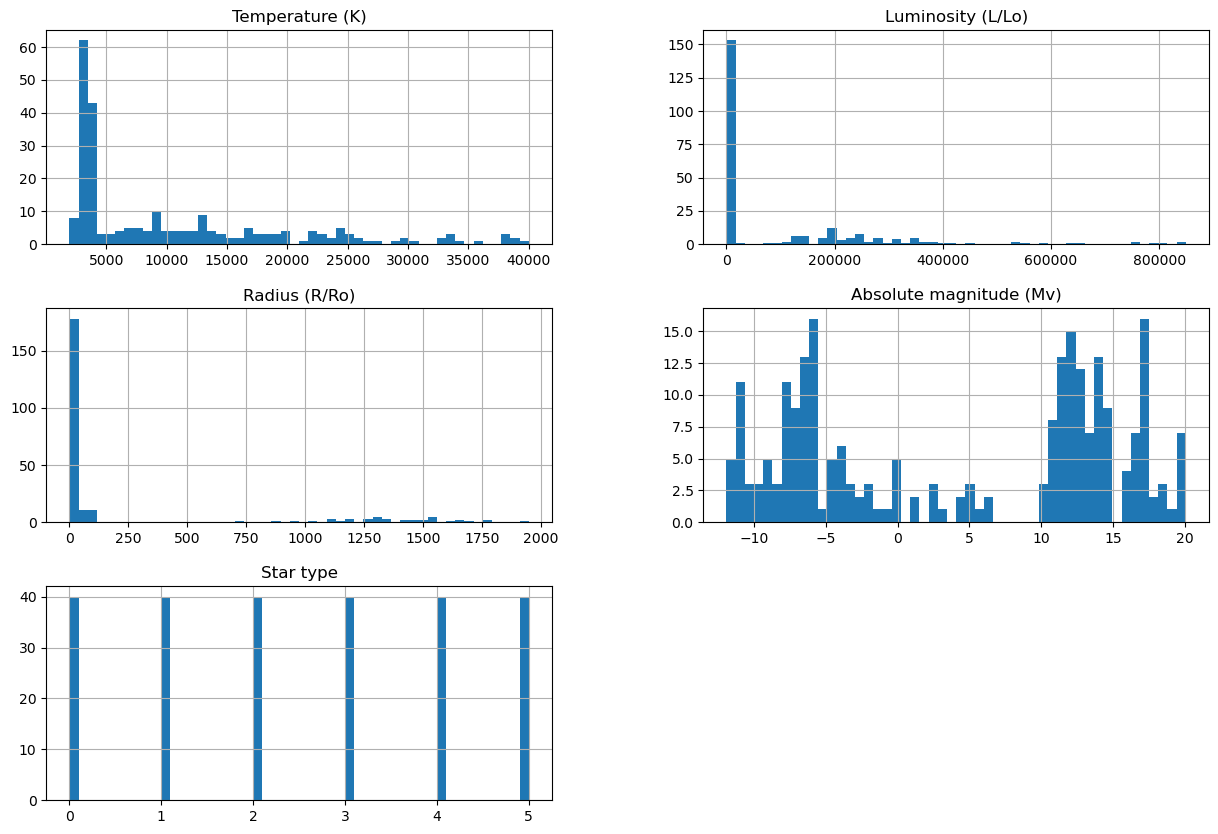

In [147]:
stars.hist(figsize = (15,10), bins = 50);
plt.show()

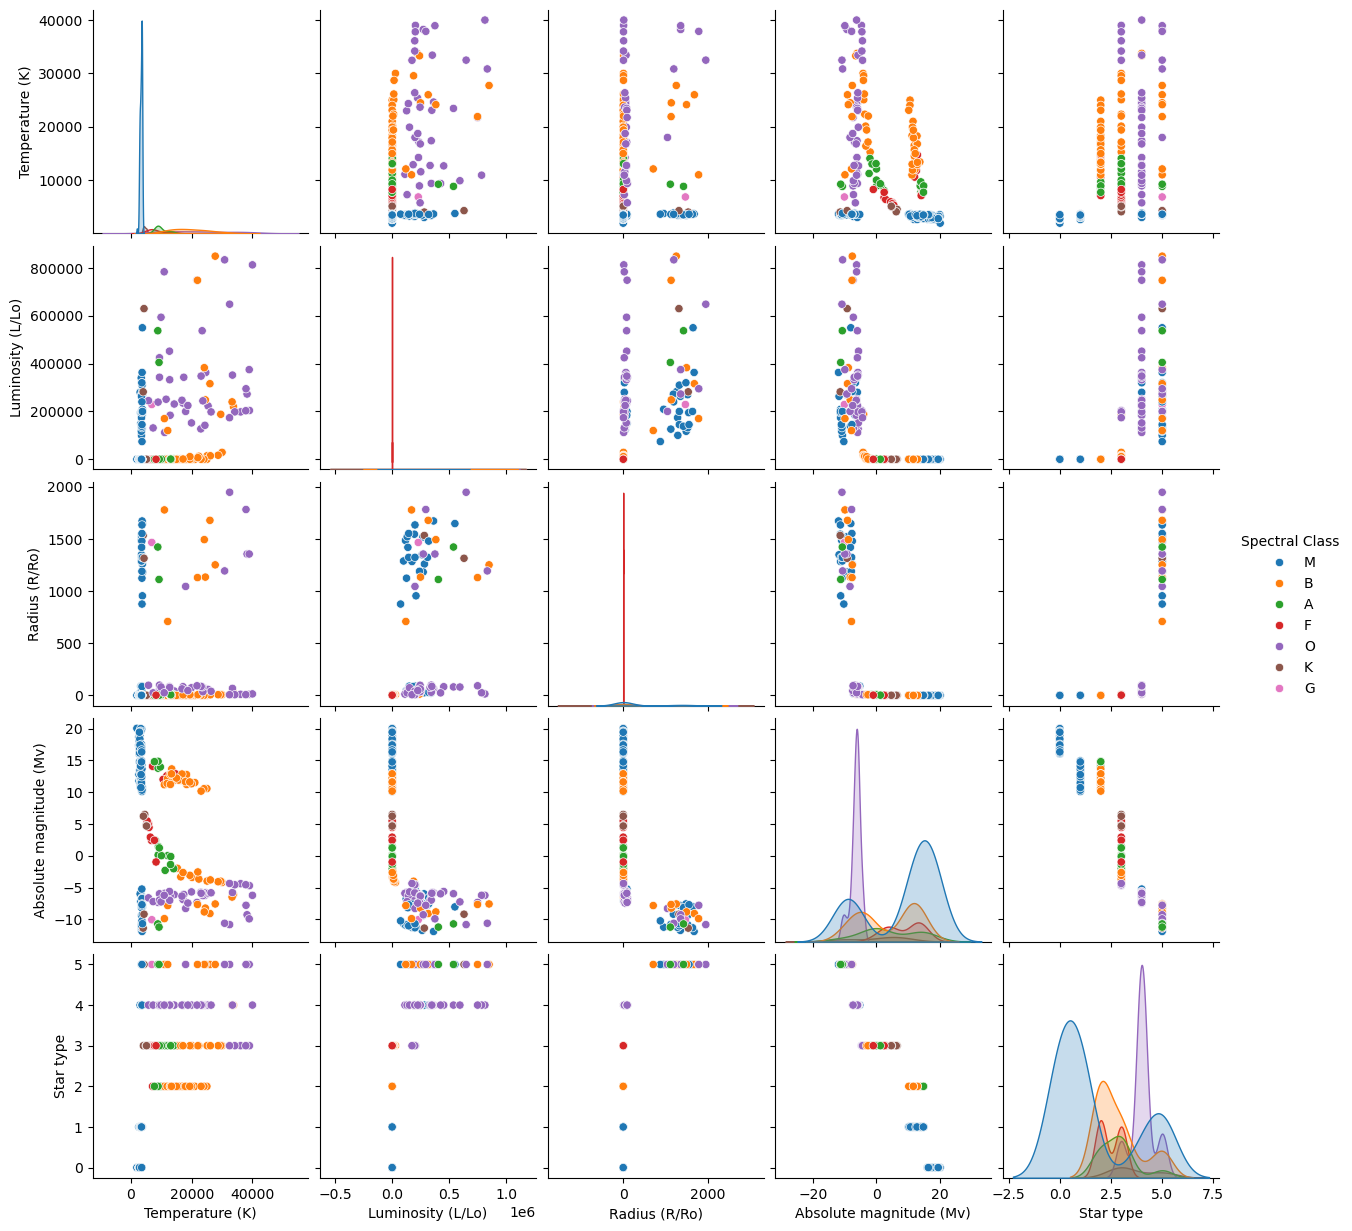

In [148]:
sns.pairplot(stars[['Temperature (K)','Luminosity (L/Lo)','Radius (R/Ro)','Absolute magnitude (Mv)','Star type', 'Spectral Class']], hue = 'Spectral Class')
plt.show()

## Вывод

Можно заметить множество зависимостей, таких как например: 
- Зависимость между "Temperature (K)" и "Radius (R/Ro)" 
- Зависимость между "Temperature (K)" и "Luminosity (L/Lo)" 
- Зависимость между "Luminosity (L/Lo)" и "Radius (R/Ro)" 
- Зависимость между "Spectral Class" и "Temperature (K)" \
 Класс M (красные карлики) имеет низкую температуру, а класс O (голубые гиганты) — высокую.


In [151]:
corr = stars[['Temperature (K)','Luminosity (L/Lo)','Radius (R/Ro)','Absolute magnitude (Mv)','Star type']].corr()
corr

,Temperature (K),Luminosity (L/Lo),Radius (R/Ro),Absolute magnitude (Mv),Star type
Temperature (K),1.000000,0.393404,0.064216,-0.420261,0.411129
Luminosity (L/Lo),0.393404,1.000000,0.526516,-0.692619,0.676845
Radius (R/Ro),0.064216,0.526516,1.000000,-0.608728,0.660975
Absolute magnitude (Mv),-0.420261,-0.692619,-0.608728,1.000000,-0.955276
Star type,0.411129,0.676845,0.660975,-0.955276,1.000000


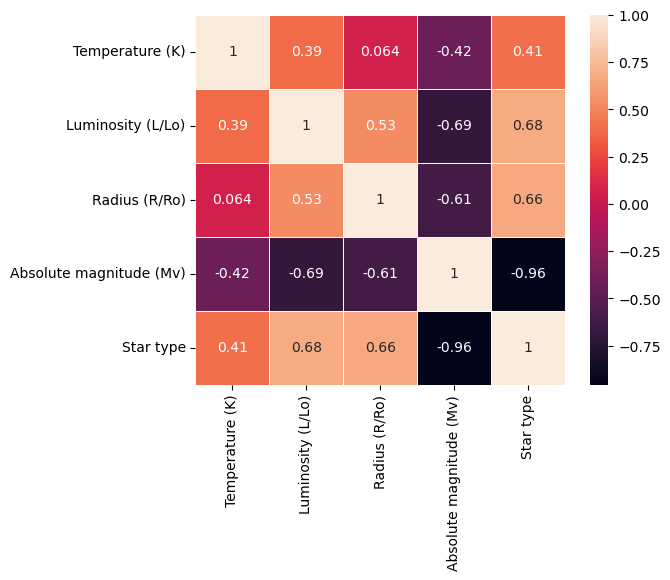

In [153]:
sns.heatmap(corr, square=True, annot=True, linewidths=0.5)
plt.show()

## Вывод

Видно множество зависимостей, самая сильная между Star type и absolute magniture - 0.96

## Обучение классификатора 

In [157]:
# генерация фиктивных переменных
star_category_cols = pd.get_dummies(stars["Star category"], dtype=int)
star_category_cols.head()

,Brown Dwarf,Hypergiant,Main Sequence,Red Dwarf,Supergiant,White Dwarf
0,1,0,0,0,0,0
1,1,0,0,0,0,0
2,1,0,0,0,0,0
3,1,0,0,0,0,0
4,1,0,0,0,0,0


## Датасет для обучения моделей


In [159]:
star_list = ['Temperature (K)', 'Luminosity (L/Lo)', 'Radius (R/Ro)', 'Absolute magnitude (Mv)', 'Star type']

In [160]:
X = pd.concat([stars[star_list], star_category_cols], axis = 1)
X.shape

(240, 11)

In [161]:
X.head()

,Temperature (K),Luminosity (L/Lo),Radius (R/Ro),Absolute magnitude (Mv),Star type,Brown Dwarf,Hypergiant,Main Sequence,Red Dwarf,Supergiant,White Dwarf
0,3068,0.002400,0.1700,16.12,0,1,0,0,0,0,0
1,3042,0.000500,0.1542,16.60,0,1,0,0,0,0,0
2,2600,0.000300,0.1020,18.70,0,1,0,0,0,0,0
3,2800,0.000200,0.1600,16.65,0,1,0,0,0,0,0
4,1939,0.000138,0.1030,20.06,0,1,0,0,0,0,0


In [162]:
y = stars['Spectral Class']
stars['Spectral Class'].value_counts()

Spectral Class
M    111
B     46
O     40
A     19
F     17
K      6
G      1
Name: count, dtype: int64

In [163]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(160, 11) (80, 11) (160,) (80,)


In [164]:
from sklearn.metrics import accuracy_score

## KNeighborsClassifier (Классификация ближайших соседей)

In [166]:
from sklearn.neighbors import KNeighborsClassifier

In [167]:
%%time
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

CPU times: total: 0 ns
Wall time: 3.37 ms


KNeighborsClassifier()

In [168]:
knn.predict(X_test)

array(['B', 'M', 'F', 'M', 'M', 'O', 'O', 'B', 'M', 'B', 'M', 'B', 'M',
       'M', 'M', 'O', 'M', 'M', 'A', 'M', 'M', 'M', 'O', 'O', 'M', 'O',
       'M', 'B', 'O', 'B', 'F', 'M', 'B', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'O', 'M', 'M', 'M', 'B', 'M', 'M', 'F', 'M', 'M', 'B', 'M',
       'B', 'M', 'O', 'B', 'M', 'A', 'M', 'M', 'B', 'M', 'M', 'M', 'O',
       'M', 'M', 'B', 'B', 'M', 'M', 'M', 'F', 'M', 'M', 'A', 'M', 'M',
       'O', 'O'], dtype=object)

In [169]:
knn_pred_test = knn.predict(X_test)
display(knn_pred_test[:20], np.array(y_test[:20]))

array(['B', 'M', 'F', 'M', 'M', 'O', 'O', 'B', 'M', 'B', 'M', 'B', 'M',
       'M', 'M', 'O', 'M', 'M', 'A', 'M'], dtype=object)

array(['B', 'M', 'K', 'O', 'O', 'K', 'B', 'B', 'M', 'B', 'M', 'B', 'M',
       'O', 'M', 'B', 'M', 'M', 'A', 'M'], dtype=object)

In [170]:
y_train_predict = knn.predict(X_train) 
y_test_predict = knn.predict(X_test)

print('train accuracy: ', accuracy_score(y_train, y_train_predict, normalize=True))
print('test accuracy: ', accuracy_score(y_test, y_test_predict, normalize=True))

train accuracy:  0.85625
test accuracy:  0.75


In [171]:
knn_accuracy = accuracy_score(y_test, y_test_predict, normalize=True)

## Gaussian Naive Bayes (НАИВНЫЙ БАЙЕСОВСКИЙ КЛАССИФИКАТОР)

In [173]:
from sklearn.naive_bayes import GaussianNB

In [174]:
%%time

gnb = GaussianNB()
gnb.fit(X, y)

CPU times: total: 0 ns
Wall time: 4.17 ms


GaussianNB()

In [175]:
gnb_pred_test = gnb.predict(X_test)
display(gnb_pred_test[:20], np.array(y_test[:20]))

array(['F', 'F', 'F', 'O', 'A', 'K', 'O', 'F', 'F', 'F', 'M', 'F', 'M',
       'O', 'M', 'O', 'F', 'F', 'B', 'F'], dtype='<U1')

array(['B', 'M', 'K', 'O', 'O', 'K', 'B', 'B', 'M', 'B', 'M', 'B', 'M',
       'O', 'M', 'B', 'M', 'M', 'A', 'M'], dtype=object)

In [176]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, gnb_pred_test)

0.3625

In [177]:
gnb_y_train_predict = gnb.predict(X_train)
gnb_y_test_predict = gnb.predict(X_test)

print('train accuracy: ', accuracy_score(y_train, gnb_y_train_predict, normalize=True))
print('test accuracy: ', accuracy_score(y_test, gnb_y_test_predict, normalize=True))

train accuracy:  0.45
test accuracy:  0.3625


In [180]:
gnb_accuracy = accuracy_score(y_test, gnb_y_test_predict)

## Random Forest Classifier (Классификатор дерева решений)

In [182]:
from sklearn.ensemble import RandomForestClassifier

In [188]:
%%time
rfc  = RandomForestClassifier(criterion = 'gini',
                                    n_estimators = 100,
                                    max_depth = 9,
                                    random_state = 42,
                                    n_jobs = -1)

rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

CPU times: total: 266 ms
Wall time: 279 ms


In [198]:
rfc_pred_test = rfc.predict(X_test)
display(rfc_pred_test[:20], np.array(y_test[:20]))

array(['B', 'M', 'F', 'O', 'O', 'M', 'B', 'B', 'M', 'B', 'M', 'B', 'M',
       'O', 'M', 'B', 'M', 'M', 'B', 'M'], dtype=object)

array(['B', 'M', 'K', 'O', 'O', 'K', 'B', 'B', 'M', 'B', 'M', 'B', 'M',
       'O', 'M', 'B', 'M', 'M', 'A', 'M'], dtype=object)

In [206]:
rfc_y_train_predict = rfc.predict(X_train)
rfc_y_test_predict = rfc.predict(X_test)

print('train accuracy: ', accuracy_score(y_train, rfc_y_train_predict, normalize=True))
print('test accuracy: ', accuracy_score(y_test, rfc_y_test_predict, normalize=True))

train accuracy:  1.0
test accuracy:  0.9


In [207]:
rfc_accuracy = accuracy_score(y_test, rfc_y_test_predict)

## Метрики и оценка моделей

In [210]:
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error, precision_score, recall_score, f1_score, confusion_matrix, r2_score
from sklearn.metrics import classification_report

In [261]:
classifiers =["KNeighborsClassifier", "Gaussian Naive Bayes", "Random Forest Classifier"]

log_cols = ["Classifier", "Accuracy"]
log = pd.DataFrame(columns=log_cols)

log["Classifier"] = classifiers
log["Accuracy"] = [knn_accuracy, gnb_accuracy, rfc_accuracy]
log["Precision"] = [precision_score(y_test, y_pred , average='macro'), precision_score(y_test, gnb_pred_test, average='macro'), precision_score(y_test, rfc_pred_test, average='macro')]
log["Recall"] = [recall_score(y_test, y_pred, average='macro'), recall_score(y_test, gnb_pred_test, average='macro'), recall_score(y_test, rfc_pred_test, average='macro')]
log["F1-score"] = [f1_score(y_test, y_pred, average='macro'), f1_score(y_test, gnb_pred_test, average='macro'), f1_score(y_test, rfc_pred_test, average='macro')]

In [263]:
log


,Classifier,Accuracy,Precision,Recall,F1-score
0,KNeighborsClassifier,0.7500,0.667262,0.686111,0.671847
1,Gaussian Naive Bayes,0.3625,0.535240,0.457906,0.360081
2,Random Forest Classifier,0.9000,0.667262,0.686111,0.671847


## ВЫВОД

- KNeighborsClassifier - для этого датасета метод отрабатывает нормально
- Gaussian Naive Bayes - для этого датасета метод подходит плохо
- Random Forest Classifier - для этого датасета метод подходит отлично